In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\jpdealba\AppData\Local\Temp\ipykernel_24908\4220394432.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


In [2]:
DF=pd.read_csv('./data/data.csv', sep=';')
DF.head()

,Marital status,Application mode,Application order,Course,Daytime/evening attendance\t,Previous qualification,Previous qualification (grade),Nacionality,Mother's qualification,Father's qualification,...,Curricular units 2nd sem (credited),Curricular units 2nd sem (enrolled),Curricular units 2nd sem (evaluations),Curricular units 2nd sem (approved),Curricular units 2nd sem (grade),Curricular units 2nd sem (without evaluations),Unemployment rate,Inflation rate,GDP,Target
0,1,17,5,171,1,1,122.0,1,19,12,...,0,0,0,0,0.000000,0,10.8,1.4,1.74,Dropout
1,1,15,1,9254,1,1,160.0,1,1,3,...,0,6,6,6,13.666667,0,13.9,-0.3,0.79,Graduate
2,1,1,5,9070,1,1,122.0,1,37,37,...,0,6,0,0,0.000000,0,10.8,1.4,1.74,Dropout
3,1,17,2,9773,1,1,122.0,1,38,37,...,0,6,10,5,12.400000,0,9.4,-0.8,-3.12,Graduate
4,2,39,1,8014,0,1,100.0,1,37,38,...,0,6,6,6,13.000000,0,13.9,-0.3,0.79,Graduate


In [3]:
DF.shape

(4424, 37)

In [4]:
DF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4424 entries, 0 to 4423
Data columns (total 37 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Marital status                                  4424 non-null   int64  
 1   Application mode                                4424 non-null   int64  
 2   Application order                               4424 non-null   int64  
 3   Course                                          4424 non-null   int64  
 4   Daytime/evening attendance	                     4424 non-null   int64  
 5   Previous qualification                          4424 non-null   int64  
 6   Previous qualification (grade)                  4424 non-null   float64
 7   Nacionality                                     4424 non-null   int64  
 8   Mother's qualification                          4424 non-null   int64  
 9   Father's qualification                   

In [5]:
DF_dtype_counts = DF.dtypes.value_counts()

print(DF_dtype_counts)

int64      29
float64     7
object      1
Name: count, dtype: int64


In [6]:
# Checking null values
DF.isnull().sum()

Marital status                                    0
Application mode                                  0
Application order                                 0
Course                                            0
Daytime/evening attendance\t                      0
Previous qualification                            0
Previous qualification (grade)                    0
Nacionality                                       0
Mother's qualification                            0
Father's qualification                            0
Mother's occupation                               0
Father's occupation                               0
Admission grade                                   0
Displaced                                         0
Educational special needs                         0
Debtor                                            0
Tuition fees up to date                           0
Gender                                            0
Scholarship holder                                0
Age at enrol

In [7]:
# Split the DFset into features and target
DF['Target'] = DF['Target'].replace({'Graduate':0,'Dropout':1,'Enrolled':2})
X = DF.drop('Target', axis=1)
y = DF['Target']


C:\Users\jpdealba\AppData\Local\Temp\ipykernel_24908\1656948066.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  DF['Target'] = DF['Target'].replace({'Graduate':0,'Dropout':1,'Enrolled':2})


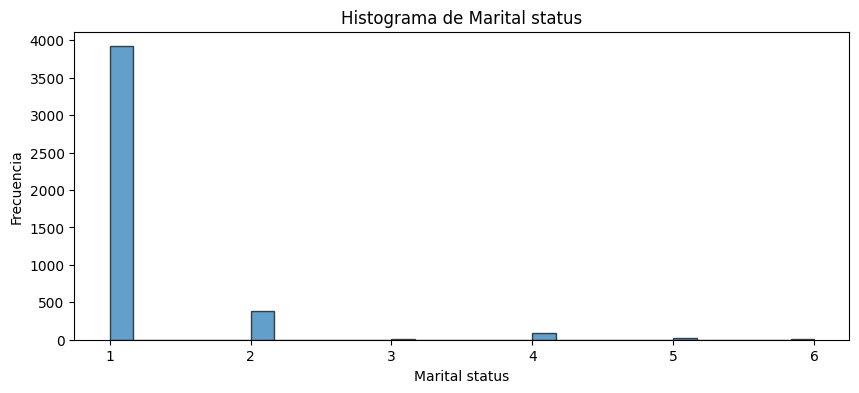

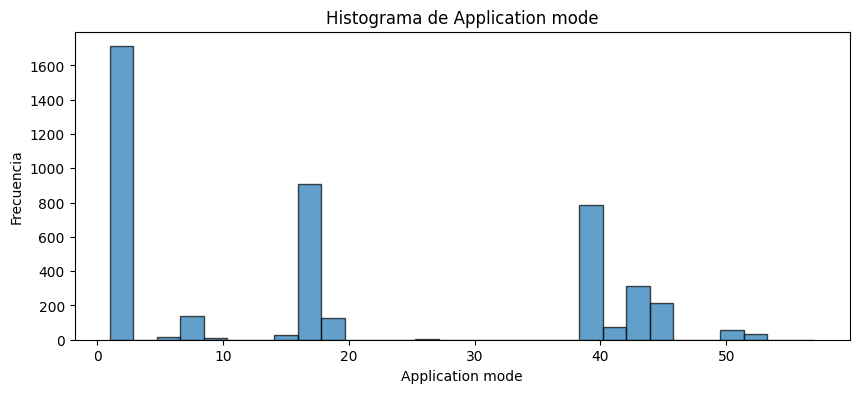

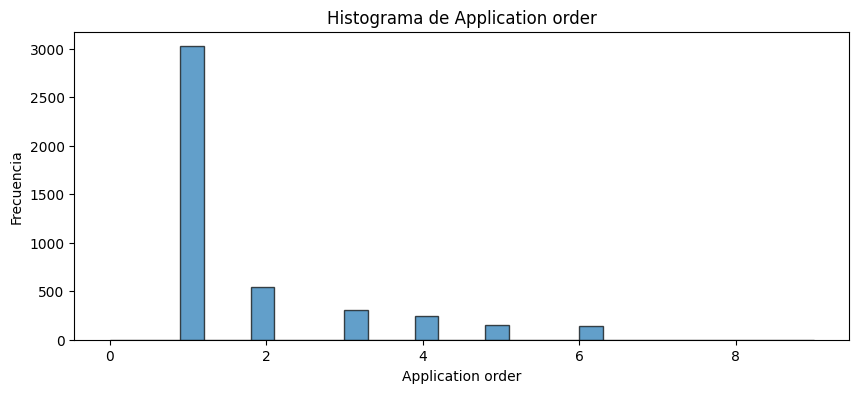

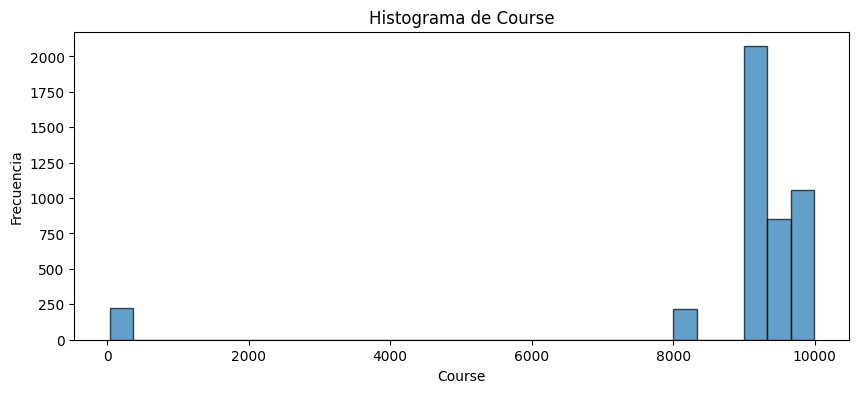

C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


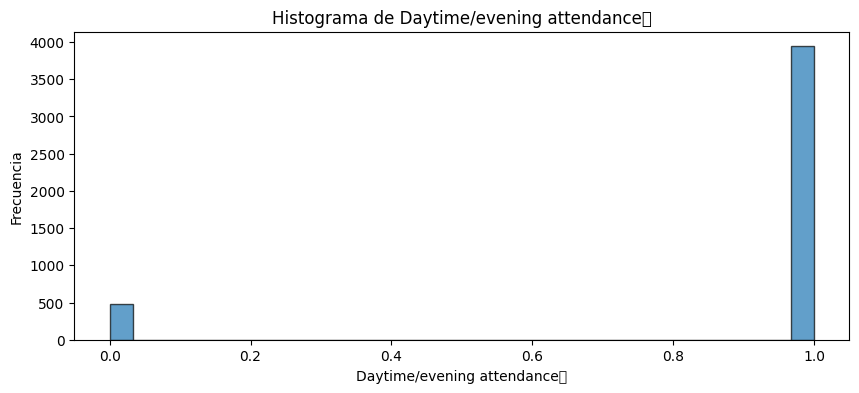

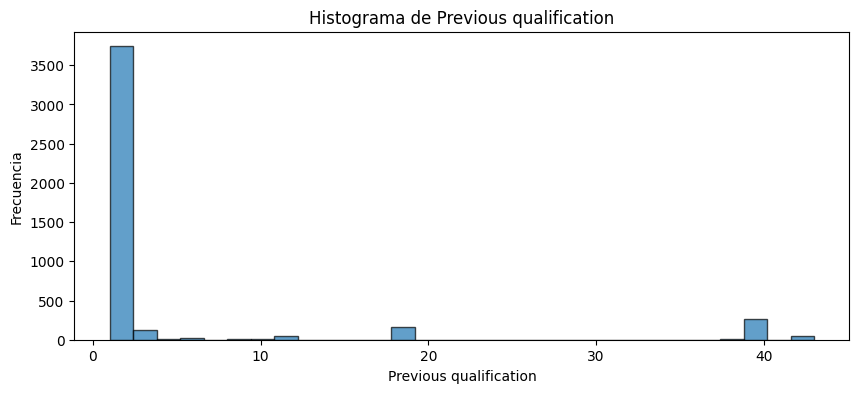

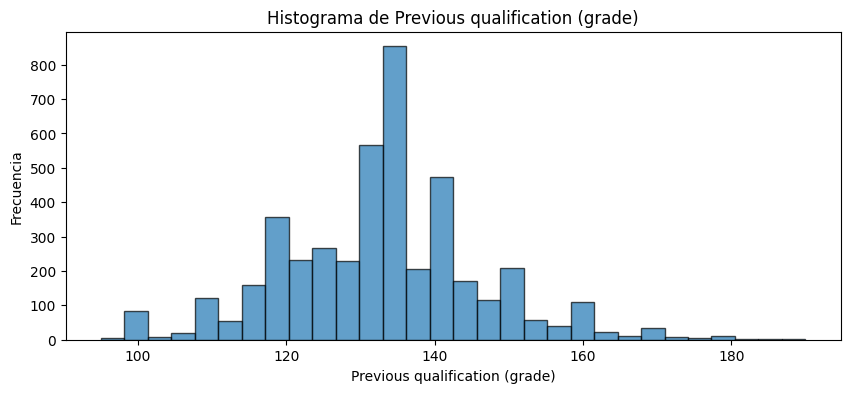

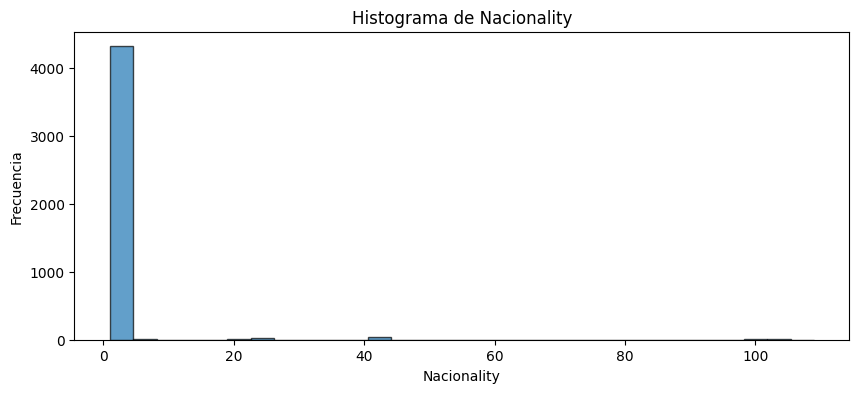

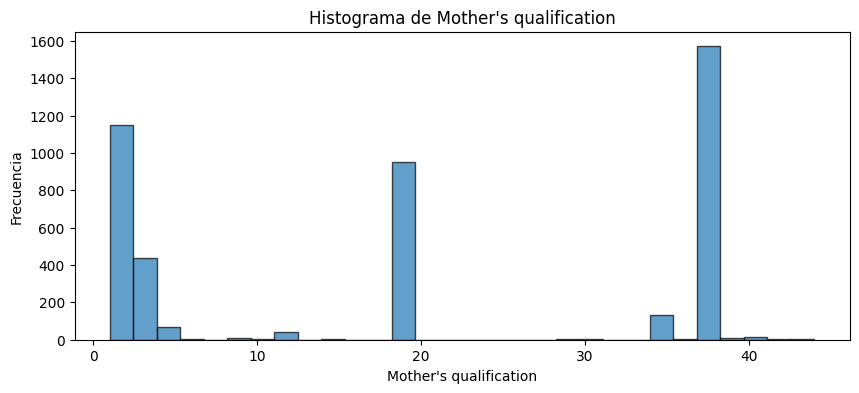

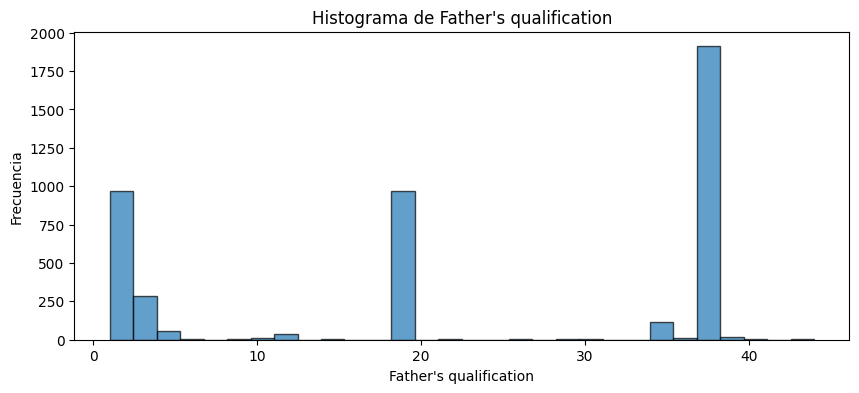

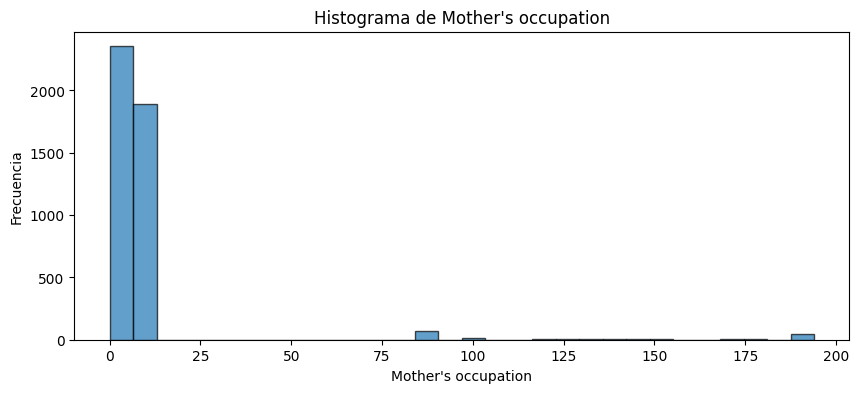

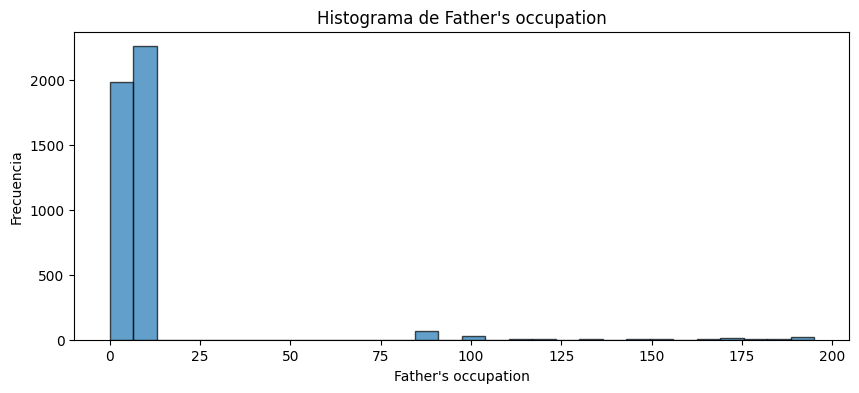

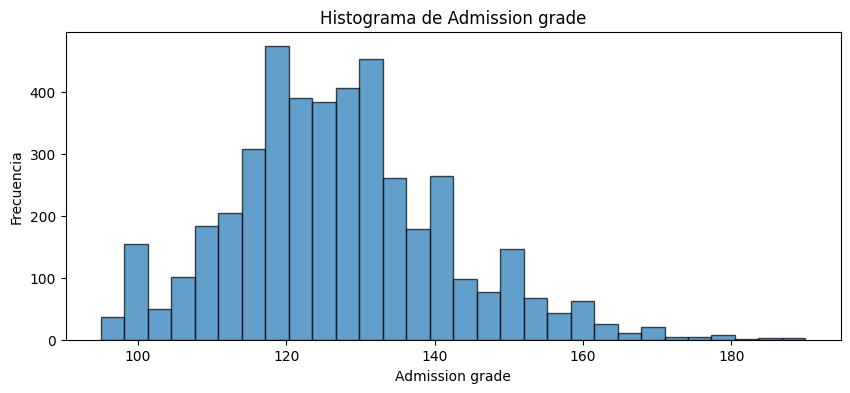

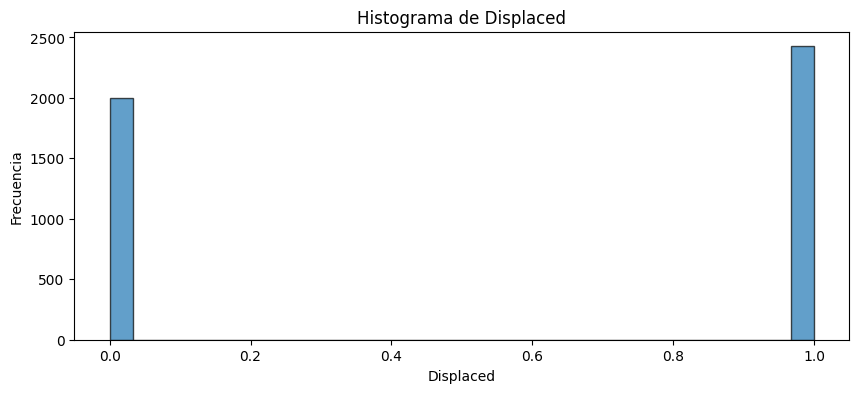

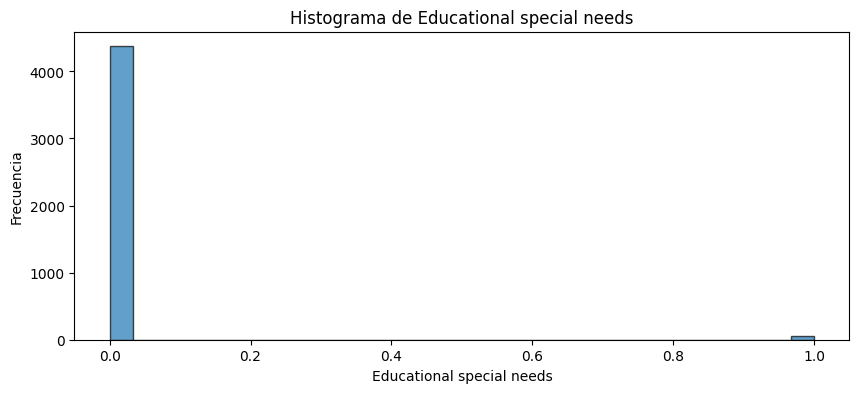

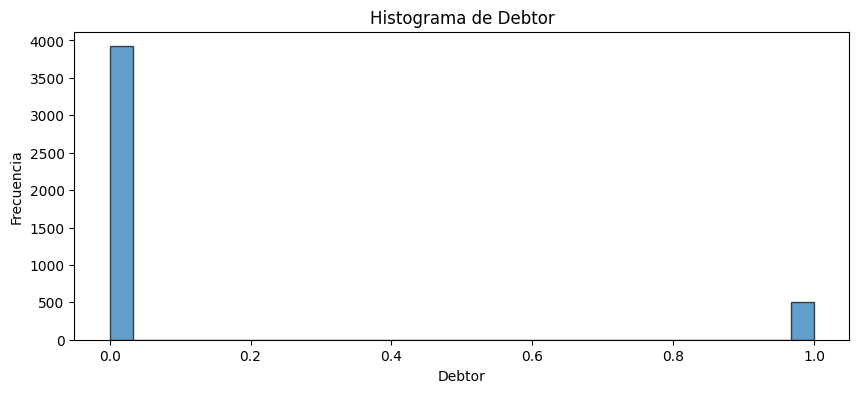

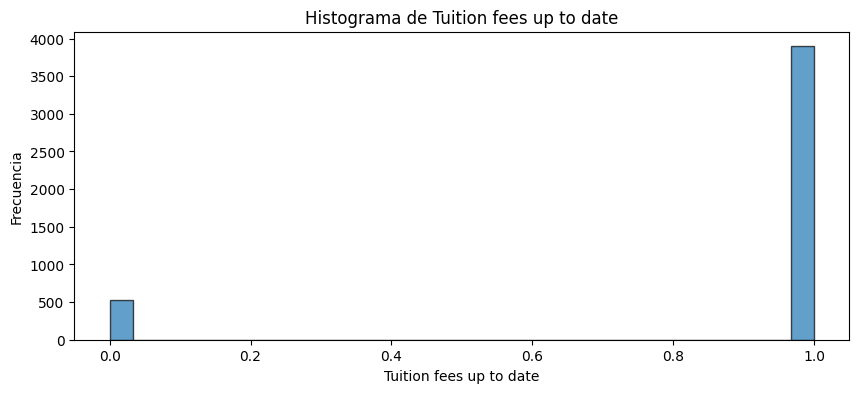

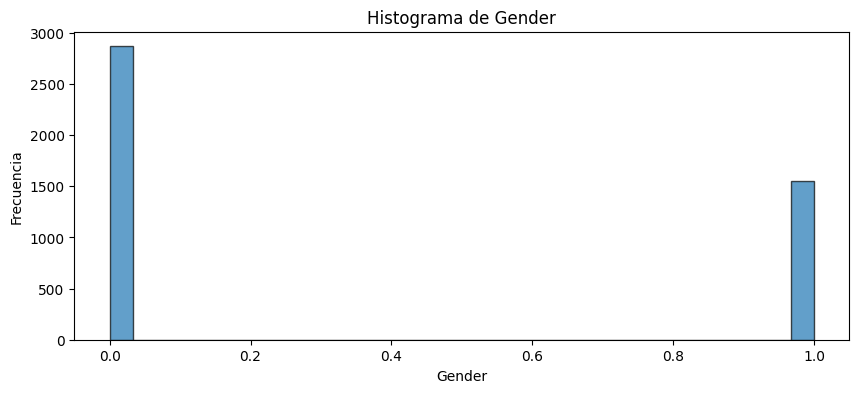

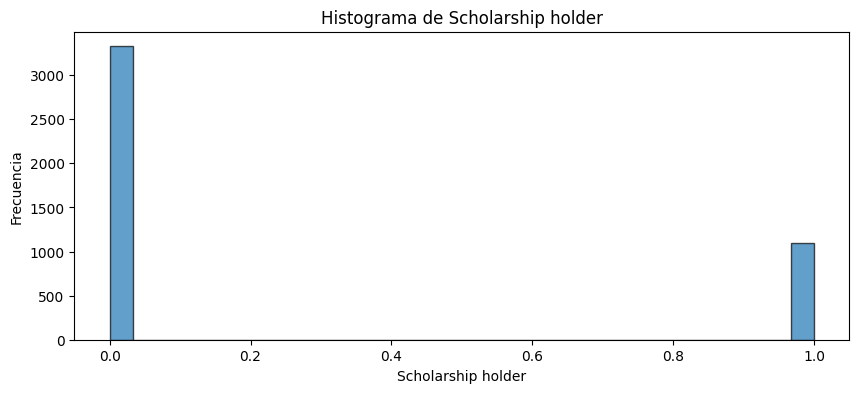

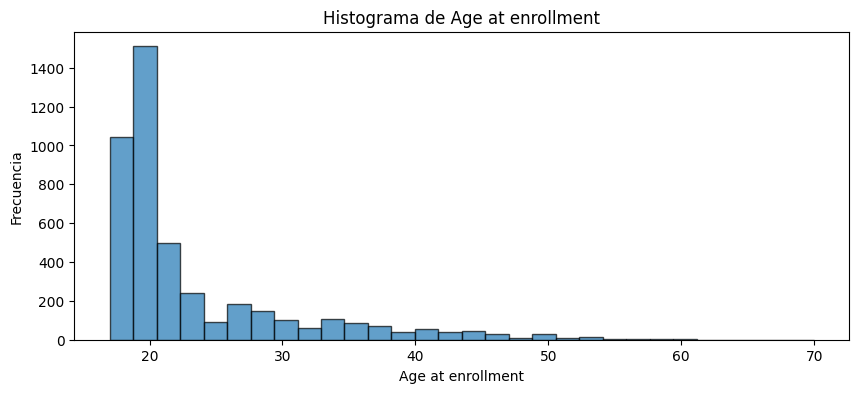

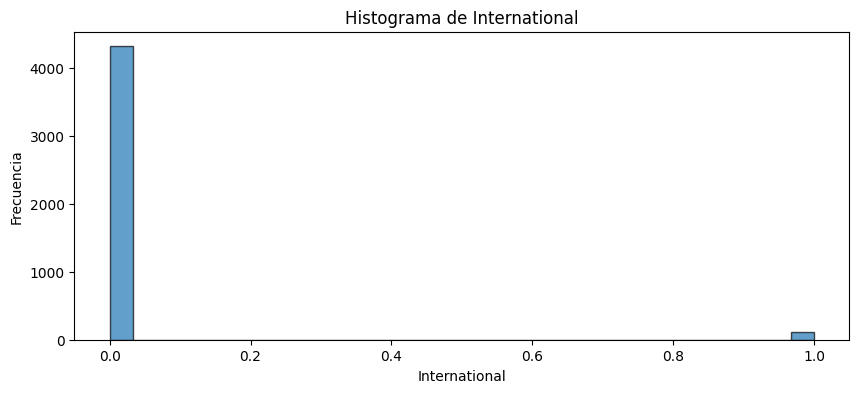

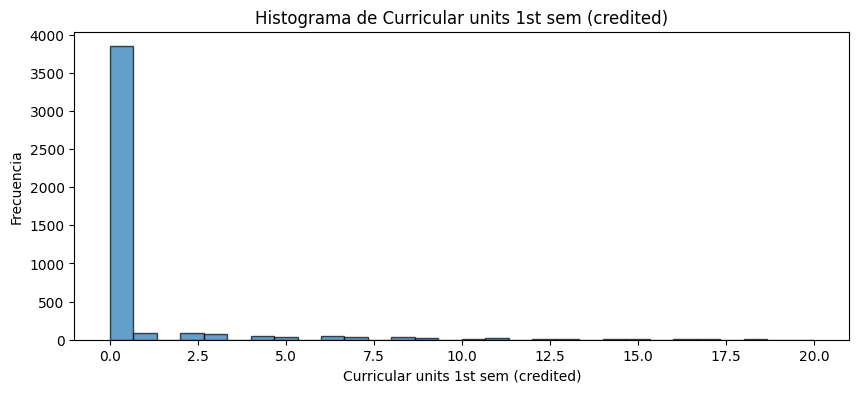

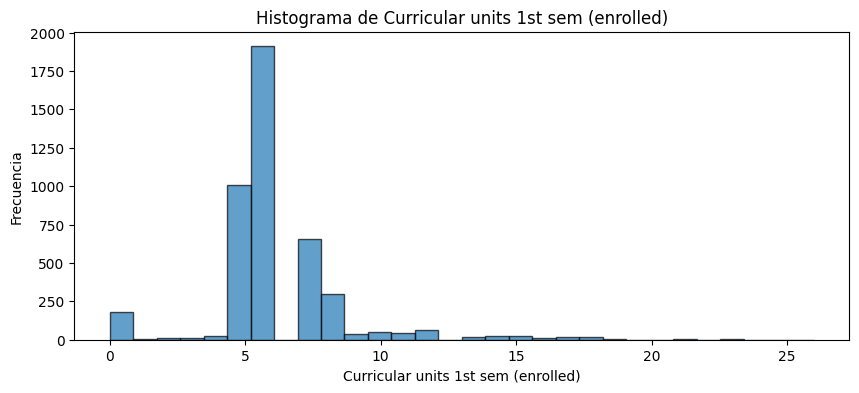

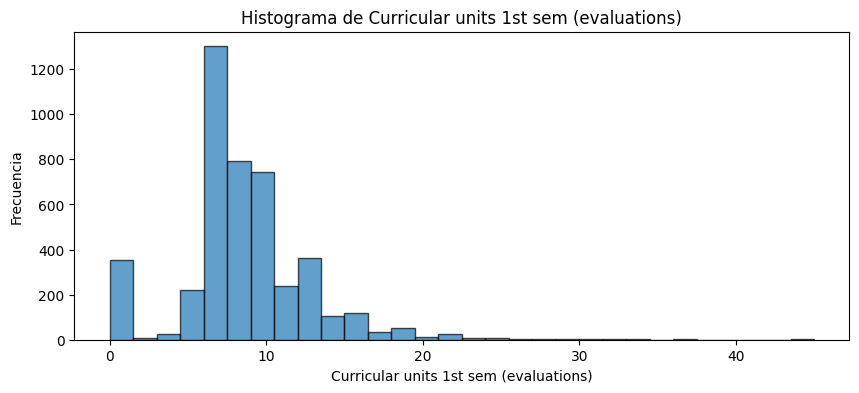

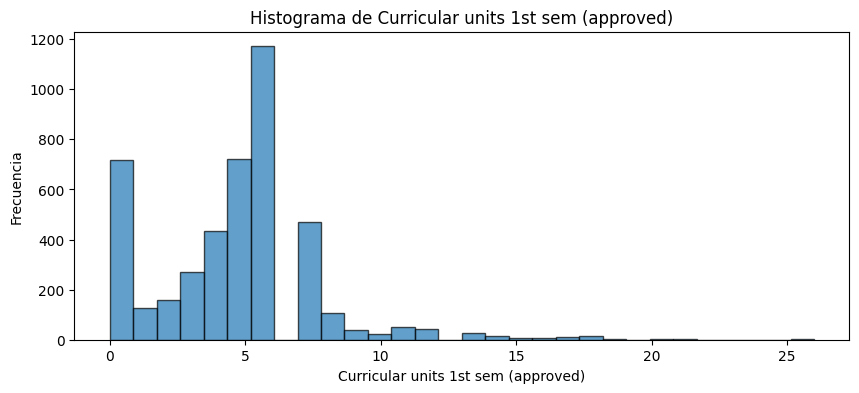

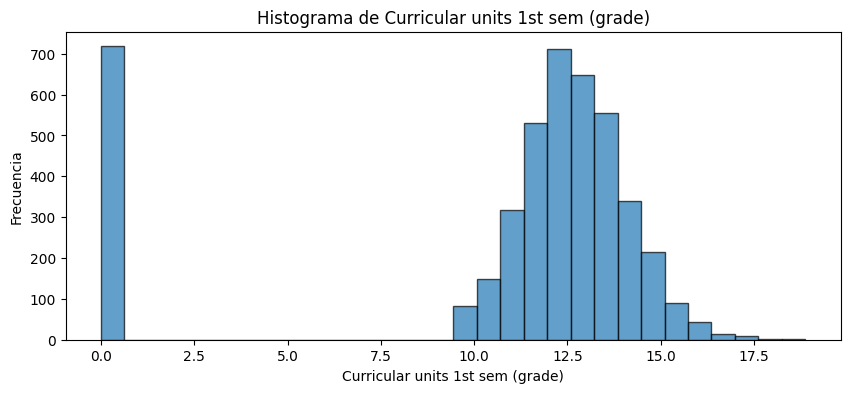

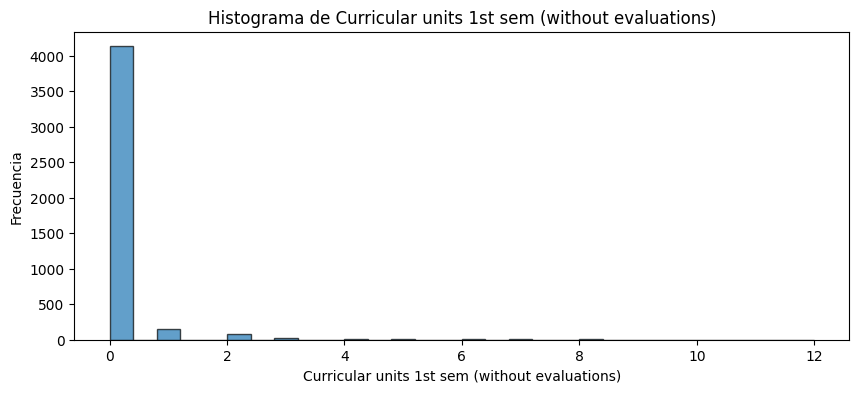

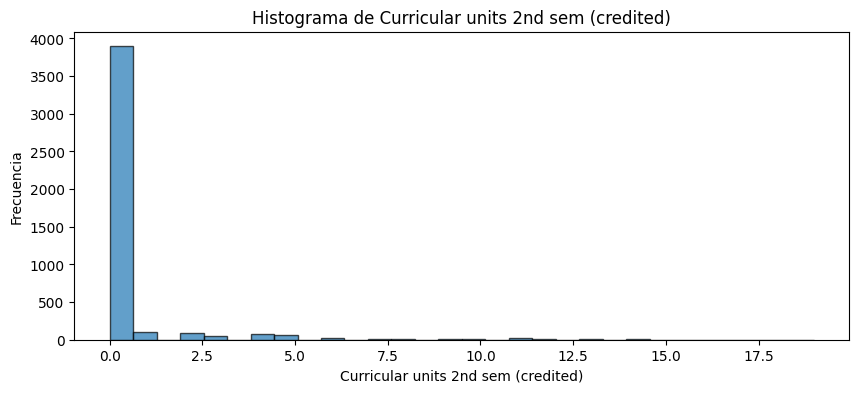

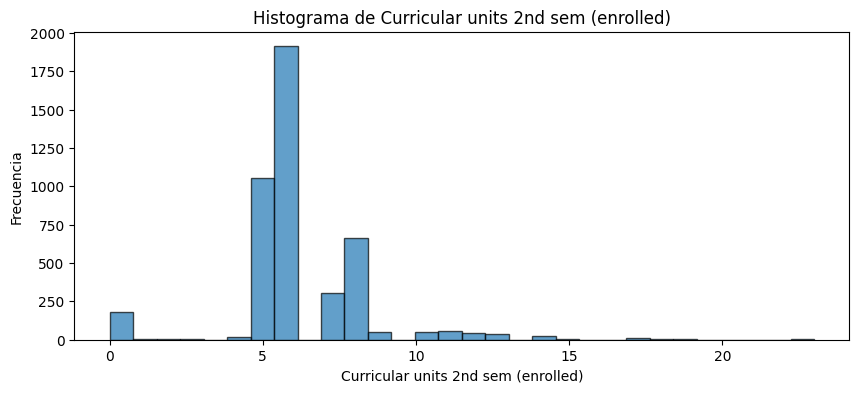

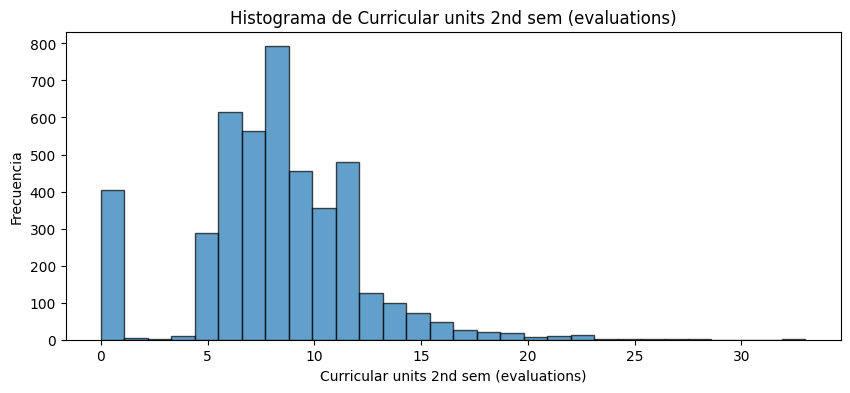

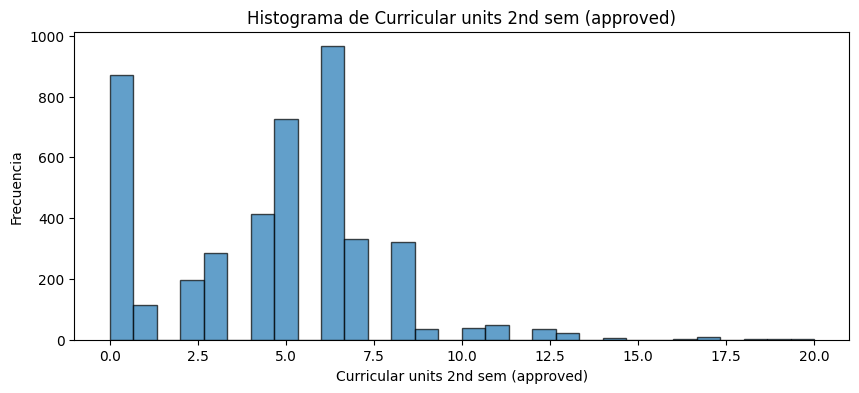

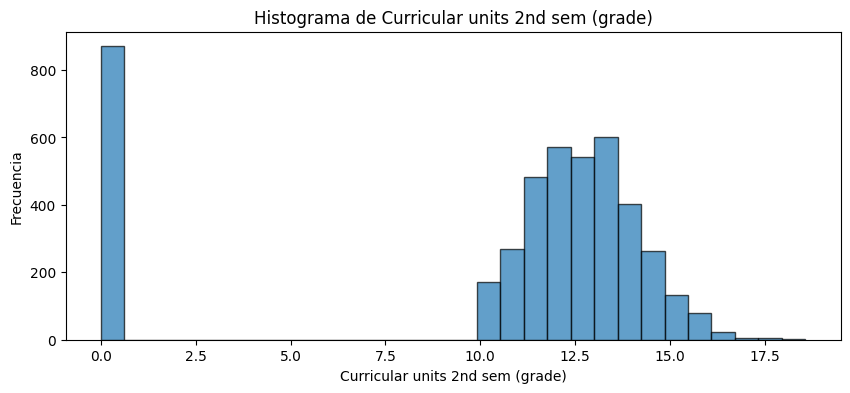

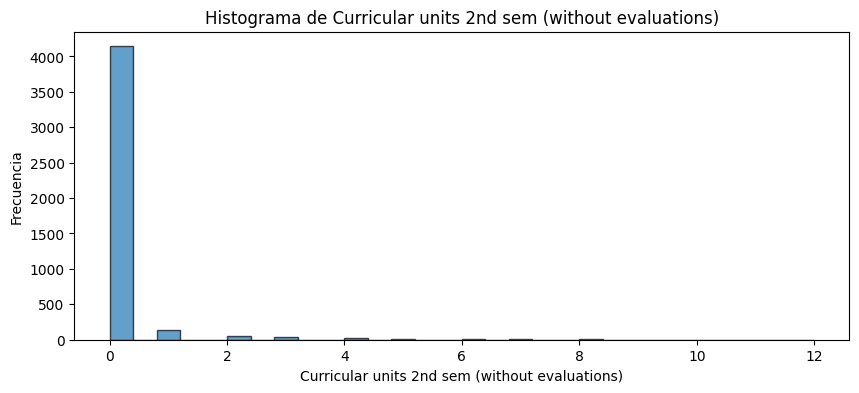

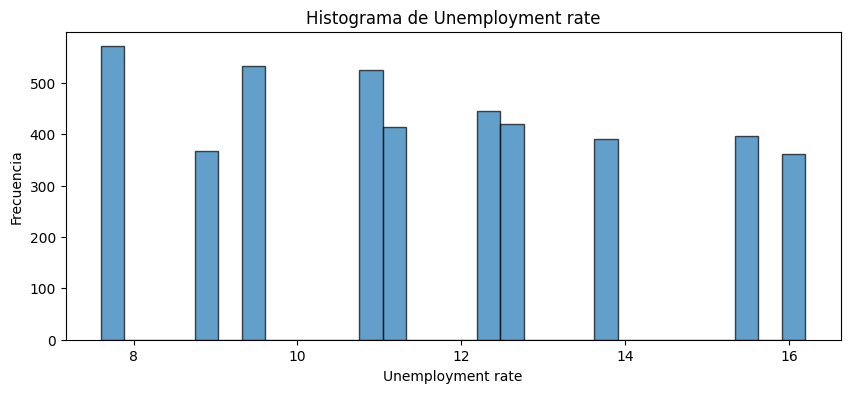

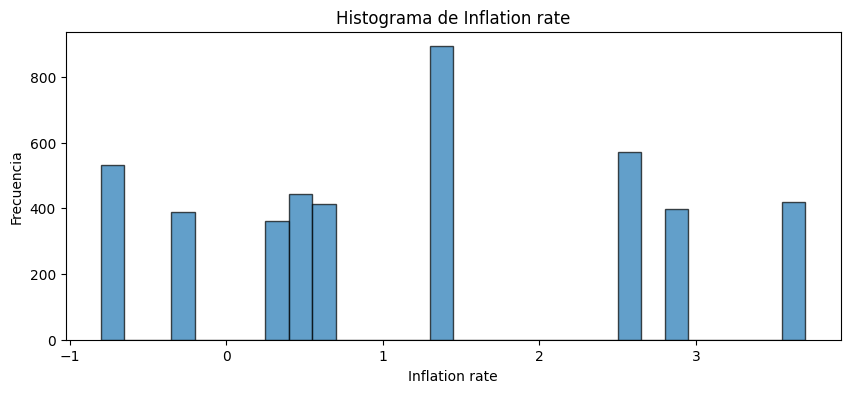

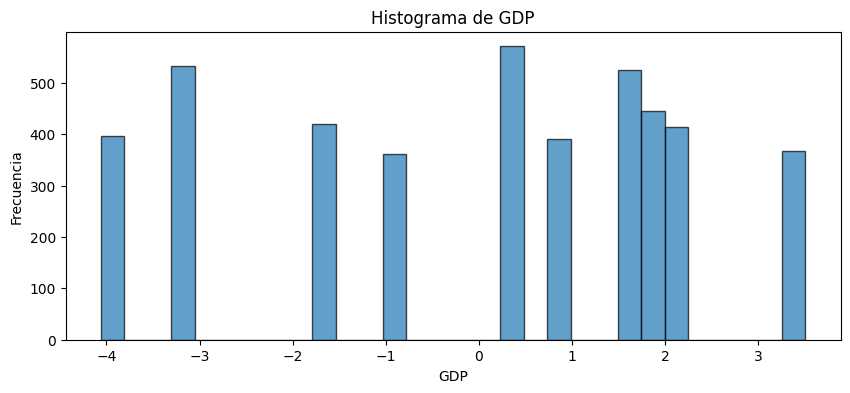

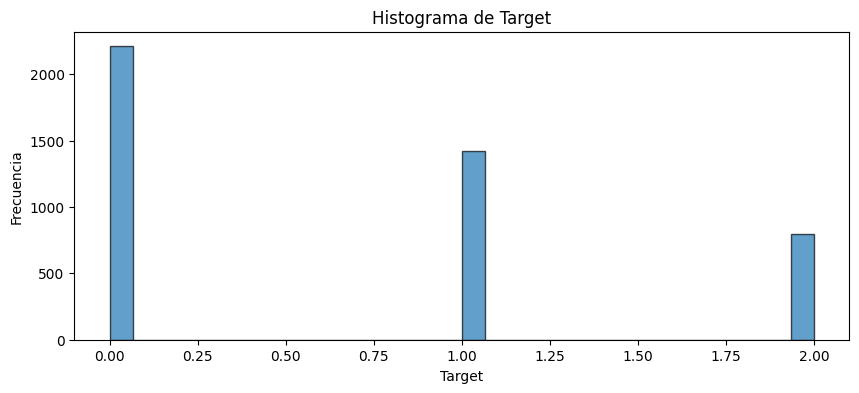

In [8]:
#En cada gráfica visualizar aquéllas columnas donde se repita el mismo valor en todos los datos
for column in DF.select_dtypes(include=['int', 'float']):
    # Comprobar si todos los valores en la columna son iguales
    if DF[column].nunique() == 1:
        print(f"Columna '{column}' tiene un valor constante: {DF[column].iloc[0]}")
    else:
        # si empieza con c_ no mostrar
        if not column.startswith('c_'):
            plt.figure(figsize=(10, 4))
            plt.hist(DF[column], bins=30, edgecolor='k', alpha=0.7)
            plt.title(f'Histograma de {column}')
            plt.xlabel(column)
            plt.ylabel('Frecuencia')
            plt.show()

In [9]:
# ver usuario masculinos y femeninos
df_male = DF[DF['Gender'] == 1]
df_fem = DF[DF['Gender'] == 0]

In [10]:
#Y observaremos nuestro dataset

print('Total = ', len(DF))
print('Número de empleados que masculinos = ', len(df_male))
print('Porcentaje de empleados masculinos = ', len(df_male)/len(DF)*100, '%')

print('Número de empleados femeninos = ', len(df_fem))
print('Número de empleados femeninos = ', len(df_fem)/len(DF)*100, '%')

Total =  4424
Número de empleados que masculinos =  1556
Porcentaje de empleados masculinos =  35.171790235081374 %
Número de empleados femeninos =  2868
Número de empleados femeninos =  64.82820976491863 %


C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\utils.py:61: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.draw()
C:\Users\jpdealba\AppData\Local\Temp\ipykernel_24908\3437505945.py:6: UserWarning: Glyph 9 (	) missing from current font.
  plt.savefig('correlation_heatmap.png', dpi=500)
C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


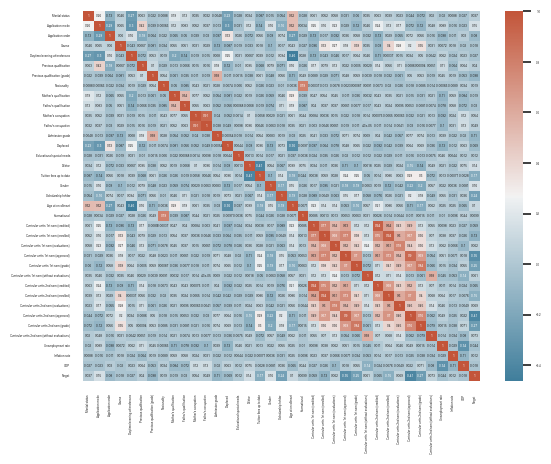

In [11]:
# Visualizar la matriz de correlación
cmap = sns.diverging_palette(230, 20, as_cmap=True)
correlation_numeric = DF.corr()
sns.set(font_scale=0.19)
sns.heatmap(correlation_numeric,annot=True, cmap=cmap)
plt.savefig('correlation_heatmap.png', dpi=500)

In [12]:
y.unique()

array([1, 0, 2], dtype=int64)

In [13]:

data = np.array(DF)
x = data[:, 0:-1]
y = data[:, -1]
y = y.reshape(-1,1)
print('x:', np.shape(x))
print('y:', np.shape(y))

x: (4424, 36)
y: (4424, 1)


In [14]:
from sklearn.model_selection import train_test_split

#2. Prepare data: add Bias and split dataset
def Bias(X):
    m,n = X.shape
    unos = np.ones((m, 1)) 
    X1 = np.column_stack((unos, X))
    return X1

x = Bias(x)

print('x shape: ', np.shape(x))

#SPLIT DATASET
test_size = 0.3
xTrain, xTest, yTrain, yTest = train_test_split(x, y,test_size = test_size)
print('Split X', len(x), 'rows into train with', len(xTrain), 'and test with', len(xTest))
print('Split Y', len(y), 'rows into train with', len(yTrain), 'and test with', len(yTest))

yTrain = yTrain.reshape(-1,1)
yTest = yTest.reshape(-1,1)

print('xTrain shape:',np.shape(xTrain), 'yTrain shape:', np.shape(yTrain))
print('xTest shape:', np.shape(xTest), 'yTest shape:', np.shape(yTest))

x shape:  (4424, 37)
Split X 4424 rows into train with 3096 and test with 1328
Split Y 4424 rows into train with 3096 and test with 1328
xTrain shape: (3096, 37) yTrain shape: (3096, 1)
xTest shape: (1328, 37) yTest shape: (1328, 1)


In [15]:
#3.1 Logistic function
def h(x, w):
    wx = np.dot(x, w.T)
    hx = 1 / (1 + np.exp(-wx))
    return hx

In [16]:
#3.2 Cost function

def cost(x, y, w):
    m = len(y)
    c = (-1/m) * np.sum(y * np.log(h(x,w)) + (1 - y) * np.log(1 - h(x,w)))
    return c


In [17]:
#3.3 Gradient function

def grad(x, y, w):
    hx = h(x, w)
    m = len(y)
    g = (1 / m) * np.dot(x.T, (hx - y))
    return g



In [18]:
# 3.4 Gradient Descent function

def gd(x, y, w, alpha = 0.001, its = 1000):
    it = 0
    costo = 0
    J = []
    while it < its:
        # Gradient
        gradiente = grad(x, y, w)
        #print(gradiente.shape)
               
        #Cost function
        costo = cost(x, y, w)
                  
        #Updating w
        w = w - alpha * gradiente.T
                
        #Storing cost
        J.append(costo)
   
        it += 1
              
    return w, J

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
[[ 1.    1.   18.   ... 10.8   1.4   1.74]
 [ 1.    1.    1.   ... 13.9  -0.3   0.79]
 [ 1.    1.    1.   ... 16.2   0.3  -0.92]
 ...
 [ 1.    1.   17.   ...  9.4  -0.8  -3.12]
 [ 1.    1.   17.   ... 13.9  -0.3   0.79]
 [ 1.    1.   43.   ... 10.8   1.4   1.74]]
[[0.]
 [0.]
 [0.]
 ...
 [1.]
 [0.]
 [1.]]
Initial Cost (training data): 0.6931471805599452


C:\Users\jpdealba\AppData\Local\Temp\ipykernel_24908\3841018654.py:5: RuntimeWarning: divide by zero encountered in log
  c = (-1/m) * np.sum(y * np.log(h(x,w)) + (1 - y) * np.log(1 - h(x,w)))
C:\Users\jpdealba\AppData\Local\Temp\ipykernel_24908\3841018654.py:5: RuntimeWarning: invalid value encountered in multiply
  c = (-1/m) * np.sum(y * np.log(h(x,w)) + (1 - y) * np.log(1 - h(x,w)))
C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\numpy\core\fromnumeric.py:88: RuntimeWarning: invalid value encountered in reduce
  return ufunc.reduce(obj, axis, dtype, out, **passkwargs)


Cost after training (training data): 4.1306941663537255
W: [[ 6.69064592e-04  2.26816562e-03  1.90596036e-01 -7.72687557e-03
   1.52214065e-03 -7.62242872e-05  3.86470090e-02 -4.69602442e-03
   1.19660548e-02 -8.73744464e-03 -2.27823097e-02  3.74187633e-02
   3.33571032e-02 -4.20472730e-03 -1.88850909e-03  2.03010153e-04
   3.44344081e-03 -3.35595323e-03  6.21943086e-03 -7.87829242e-03
   6.78541069e-02  1.88533225e-04 -7.73902492e-03 -1.79272377e-02
   2.77111909e-02 -7.57421287e-02 -8.12144218e-02  3.84183713e-03
  -7.66216238e-03 -1.86275229e-02  2.80145145e-02 -8.62805829e-02
  -9.87430787e-02  4.71629331e-03 -3.52599178e-03  2.07477283e-03
  -2.97647752e-03]]


Text(0, 0.5, 'Cost')

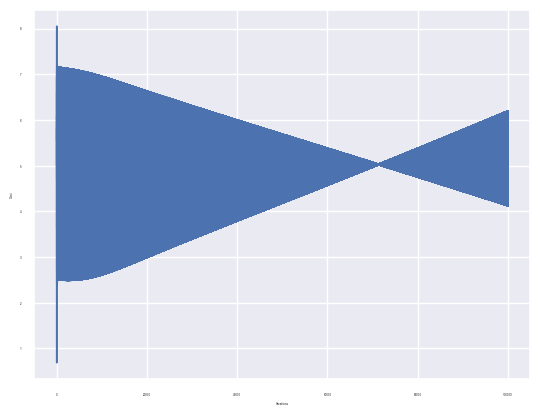

In [19]:
alpha = 0.000001
its = 100000

m, n = np.shape(x)

w = np.zeros((1, n))
print(w)

print(xTrain)
print(yTrain)
print('Initial Cost (training data):', cost(xTrain, yTrain, w))

#Gradient
w, J = gd(xTrain, yTrain, w, alpha, its)

print('Cost after training (training data):', cost(xTrain, yTrain, w))
#print('Cost after training (testing data):', cost(xTest, yTest, w))

print('W:',w)

#Plot the cost over the iterations
plt.plot(J)
plt.xlabel('Iterations')
plt.ylabel('Cost')

In [20]:
#4. Regresion logistica con codigo

def accuracy(x, y, w):
    print(x.shape, y.shape, w.shape)
    hx = h(x, w)
    print(hx.shape)
    Ynew = list(map(lambda x: 1 if x >= 0.5 else 0, hx))
    
    Ynew =np.array(Ynew)
    Ynew = Ynew.reshape(-1,1)
    suma = (y == Ynew).sum()
    a = suma / len(Ynew)
    
    return a, suma

accTrain, tptnTrain = accuracy(xTrain, yTrain, w)
accTest, tptnTest = accuracy(xTest, yTest, w)
print('Training accuracy:', accTrain, tptnTrain, 'out of', len(yTrain))
print('Testing accuracy:', accTest, tptnTest, 'out of', len(yTest))
# Accuracy del 33%

(3096, 37) (3096, 1) (1, 37)
(3096, 1)
(1328, 37) (1328, 1) (1, 37)
(1328, 1)
Training accuracy: 0.3233204134366925 1001 out of 3096
Testing accuracy: 0.3335843373493976 443 out of 1328


In [21]:
# Regresion logistica con libreria sklearn

logmodel_f = LogisticRegression()
logmodel_f.fit(xTrain, yTrain)

C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\utils\validation.py:1229: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\jpdealba\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [22]:
predictions_f = logmodel_f.predict(xTest)

In [23]:

from sklearn.metrics import classification_report

print(classification_report(yTest, predictions_f))

# Accuracy del 0.67%

              precision    recall  f1-score   support

         0.0       0.66      0.92      0.77       658
         1.0       0.74      0.67      0.70       435
         2.0       0.52      0.05      0.09       235

    accuracy                           0.68      1328
   macro avg       0.64      0.55      0.52      1328
weighted avg       0.66      0.68      0.63      1328



In [24]:
# Arbol de decision para regresion

from sklearn.tree import DecisionTreeClassifier

regressor = DecisionTreeClassifier()
regressor.fit(xTrain, yTrain)

DecisionTreeClassifier()

In [25]:
y_pred = regressor.predict(xTest)

In [26]:
scoreTrain = regressor.score(xTrain, yTrain)
scoreTest = regressor.score(xTest, yTest)

In [27]:
print('Training accuracy:', scoreTrain)
print('Testing accuracy:', scoreTest)

# Accuracy del 0.67%

Training accuracy: 1.0
Testing accuracy: 0.6581325301204819
